<a href="https://colab.research.google.com/github/MrYousri97/Heart-Disease-/blob/main/Heart_Disease_EDA_%26_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease EDA And Modeling

##importing libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Data

In [59]:
url='https://drive.google.com/file/d/11oOVcQC41WjB0EuWZTWsqvyzCSErD5UE/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

### Data Exploration

In [60]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [61]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [63]:
data.shape

(319795, 18)

In [64]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [65]:
#checking the frequency counts of variables.
for col in data.columns:
    
    print(f"""The values of {col} is : 
{data[col].value_counts().sort_index()}
------------------------------------------------""")

The values of HeartDisease is : 
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
------------------------------------------------
The values of BMI is : 
12.02    2
12.08    1
12.13    1
12.16    1
12.20    1
        ..
92.53    1
93.86    1
93.97    1
94.66    1
94.85    1
Name: BMI, Length: 3604, dtype: int64
------------------------------------------------
The values of Smoking is : 
No     187887
Yes    131908
Name: Smoking, dtype: int64
------------------------------------------------
The values of AlcoholDrinking is : 
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
------------------------------------------------
The values of Stroke is : 
No     307726
Yes     12069
Name: Stroke, dtype: int64
------------------------------------------------
The values of PhysicalHealth is : 
0.0     226589
1.0      10489
2.0      14880
3.0       8617
4.0       4468
5.0       7606
6.0       1270
7.0       4629
8.0        924
9.0        180
10.0      5453
11.0        

In [66]:
data.groupby("HeartDisease")['Sex'].value_counts(normalize=True)*100

HeartDisease  Sex   
No            Female    53.542825
              Male      46.457175
Yes           Male      58.959559
              Female    41.040441
Name: Sex, dtype: float64

In [67]:
data.groupby("Smoking")['Sex'].value_counts(normalize=True)*100

Smoking  Sex   
No       Female    56.031551
         Male      43.968449
Yes      Male      52.596507
         Female    47.403493
Name: Sex, dtype: float64

In [68]:
data.groupby("AlcoholDrinking")['Sex'].value_counts(normalize=True)*100

AlcoholDrinking  Sex   
No               Female    52.529377
                 Male      47.470623
Yes              Female    51.696744
                 Male      48.303256
Name: Sex, dtype: float64

In [69]:
data.isna().sum() 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### Data Visualization


## the overall ratio of Heart Disease 

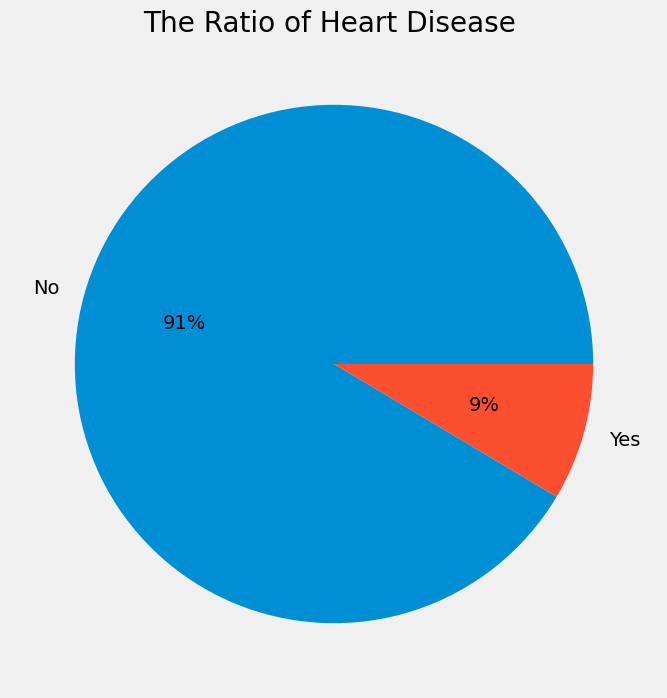

In [70]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(data['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"])
ax.set_title('The Ratio of Heart Disease ')
fig.show()

### the relation between heart disease, skin cancer & kidney disease Vs the age

In [71]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype('float')

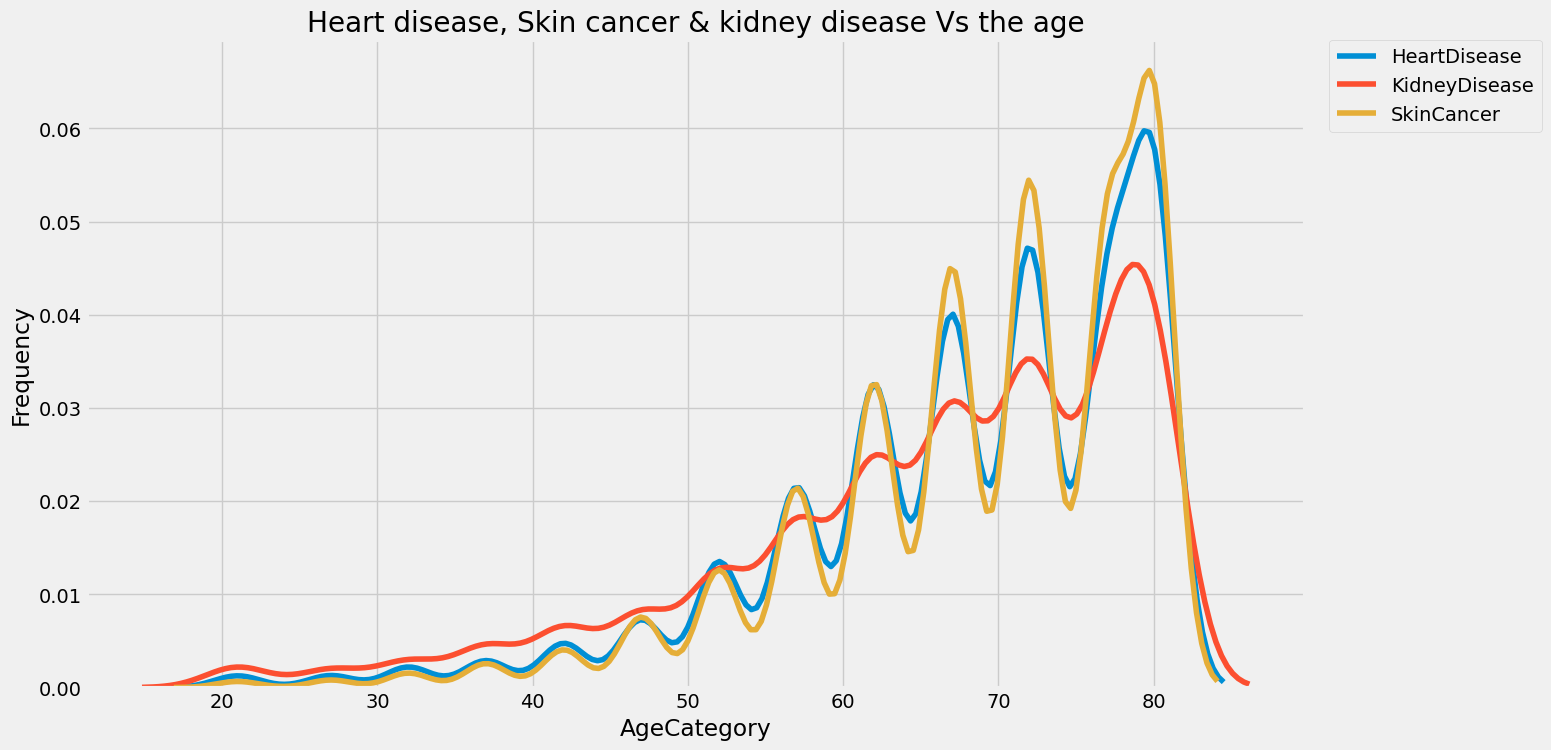

In [72]:
fig, ax = plt.subplots(figsize = (14,8))

sns.kdeplot(data[data["HeartDisease"]=='Yes']["AgeCategory"], label="HeartDisease", ax = ax)
sns.kdeplot(data[data["KidneyDisease"]=='Yes']["AgeCategory"], label="KidneyDisease", ax = ax)
sns.kdeplot(data[data["SkinCancer"]=='Yes']["AgeCategory"], label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Heart disease, Skin cancer & kidney disease Vs the age')
plt.show()

People found to have heart disease, skin cancer & kidney disease are mostly old people


##The relation between Heart Disease & Sex

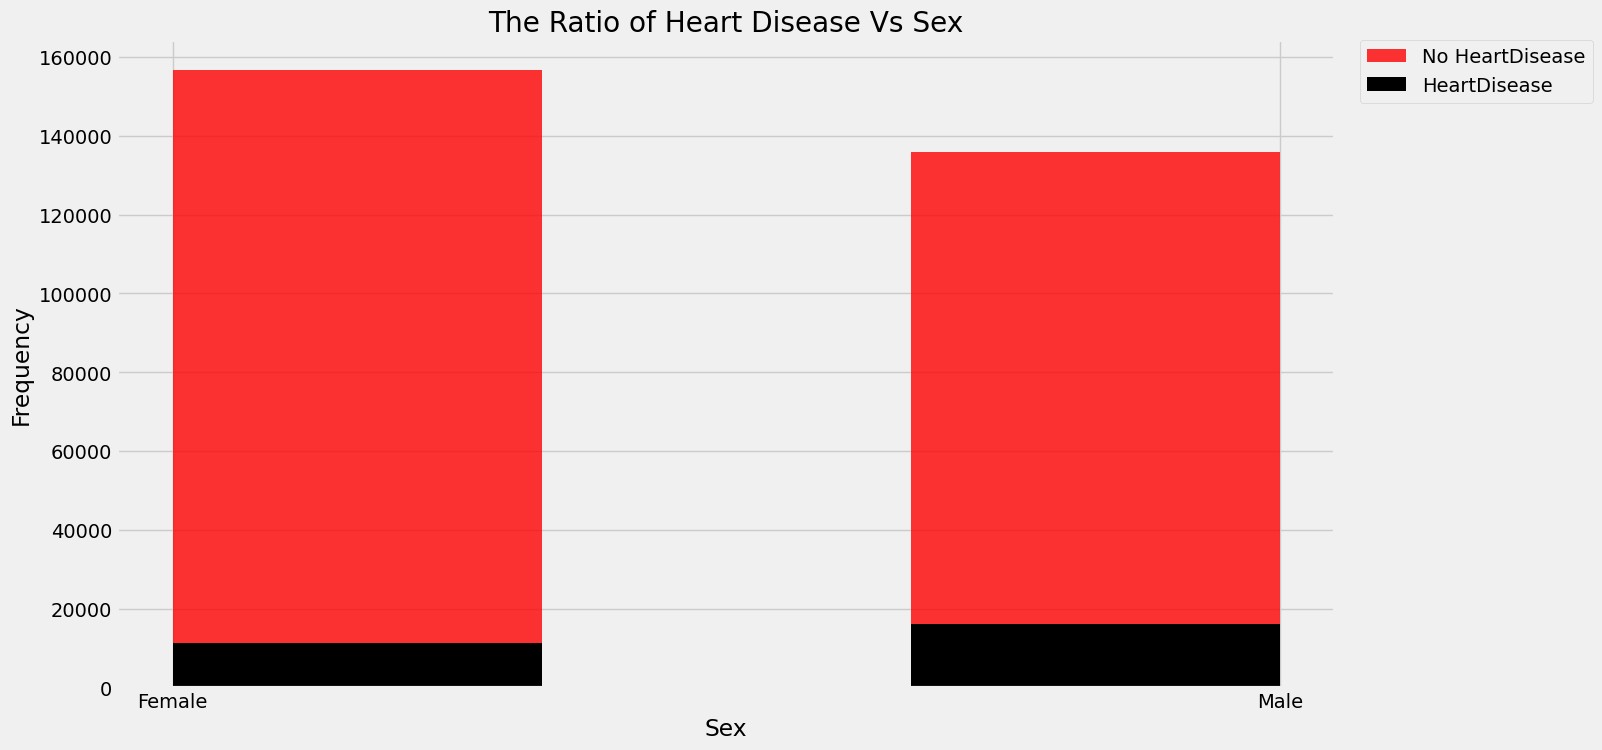

In [73]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="r", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="k", label="HeartDisease")
plt.title('The Ratio of Heart Disease Vs Sex')
ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [74]:
female_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Female')])
num_female = len(data[data['Sex']=='Female'])
male_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Male')])
num_male = len(data[data['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


Most heart disease patients are Male than Females

More Females were tested than males

## the effect of smoking in Heart disease 

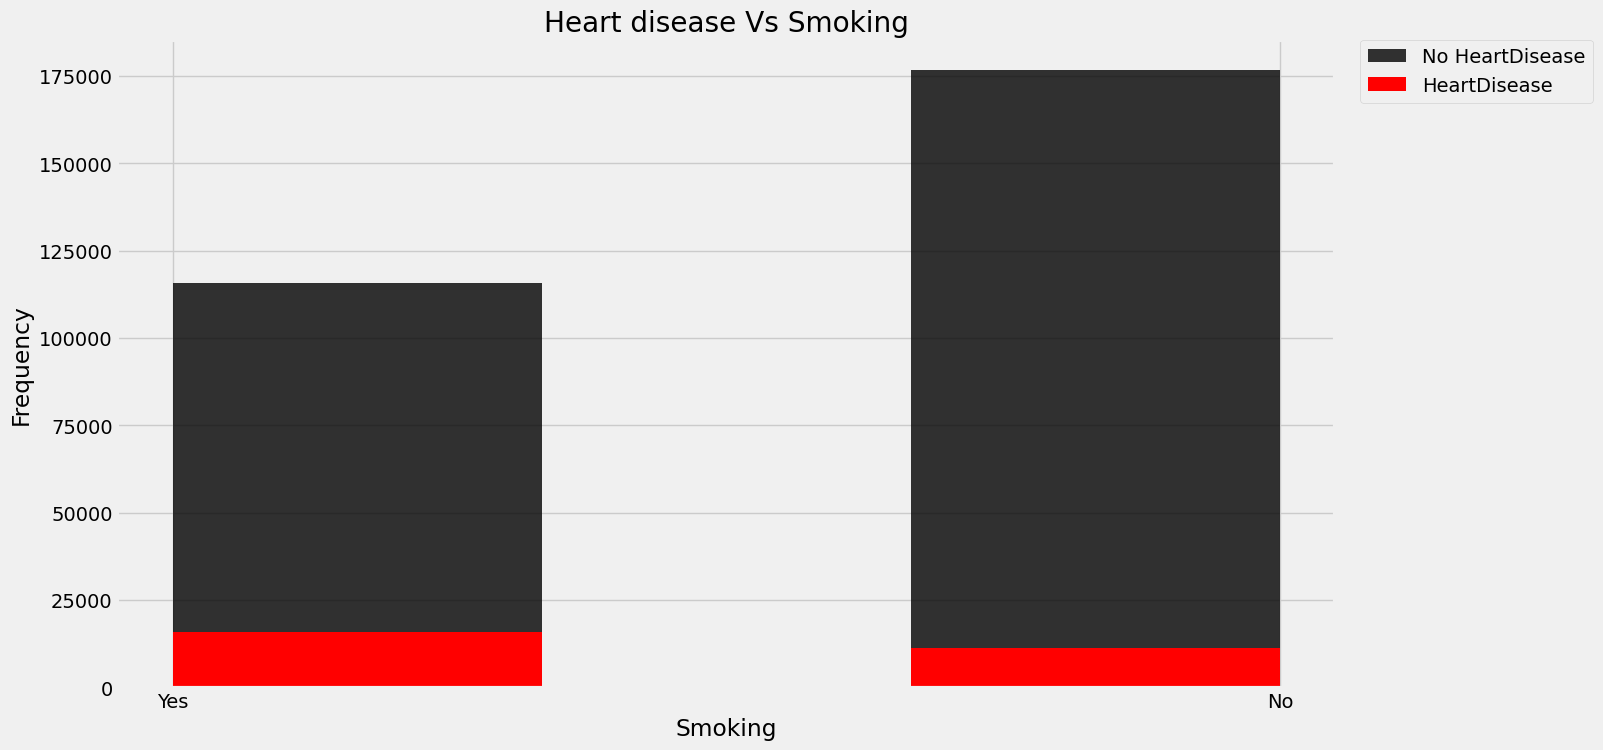

In [75]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="k", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Smoking')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [76]:
smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='Yes')])
num_smoke = len(data[data['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='No')])
num_no_smoke = len(data[data['Smoking']=='No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


Most heart disease patients smoke

People who smoke are approximately twice as likely to have heart disease than people who don't smoke

##the relation of Heart disease Vs the race

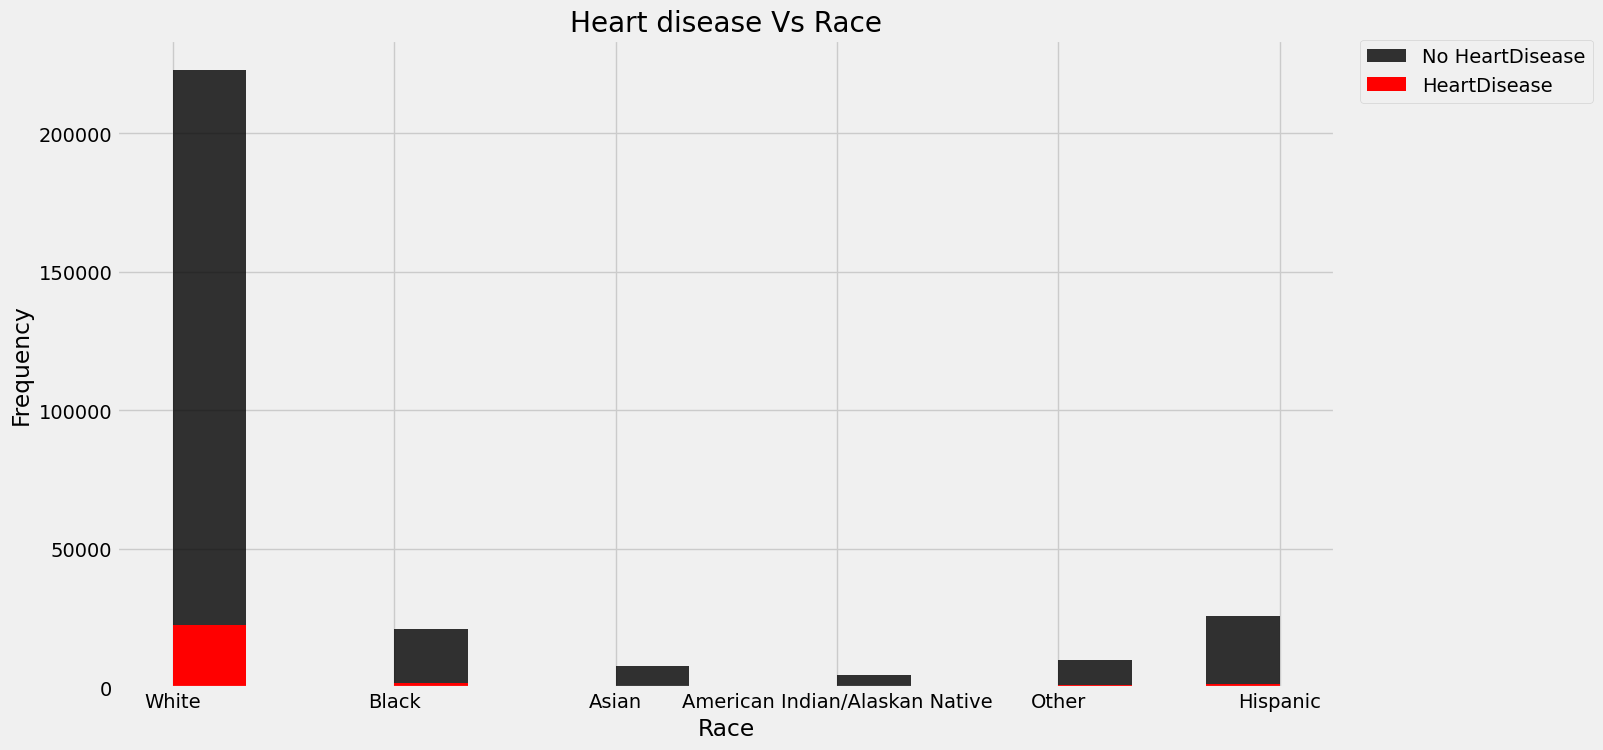

In [77]:
fig, ax = plt.subplots(figsize = (14,8))

ax.hist(data[data["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="k", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs Race')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Most Heart Disease Patients are White people

##general health affect to Heart disease

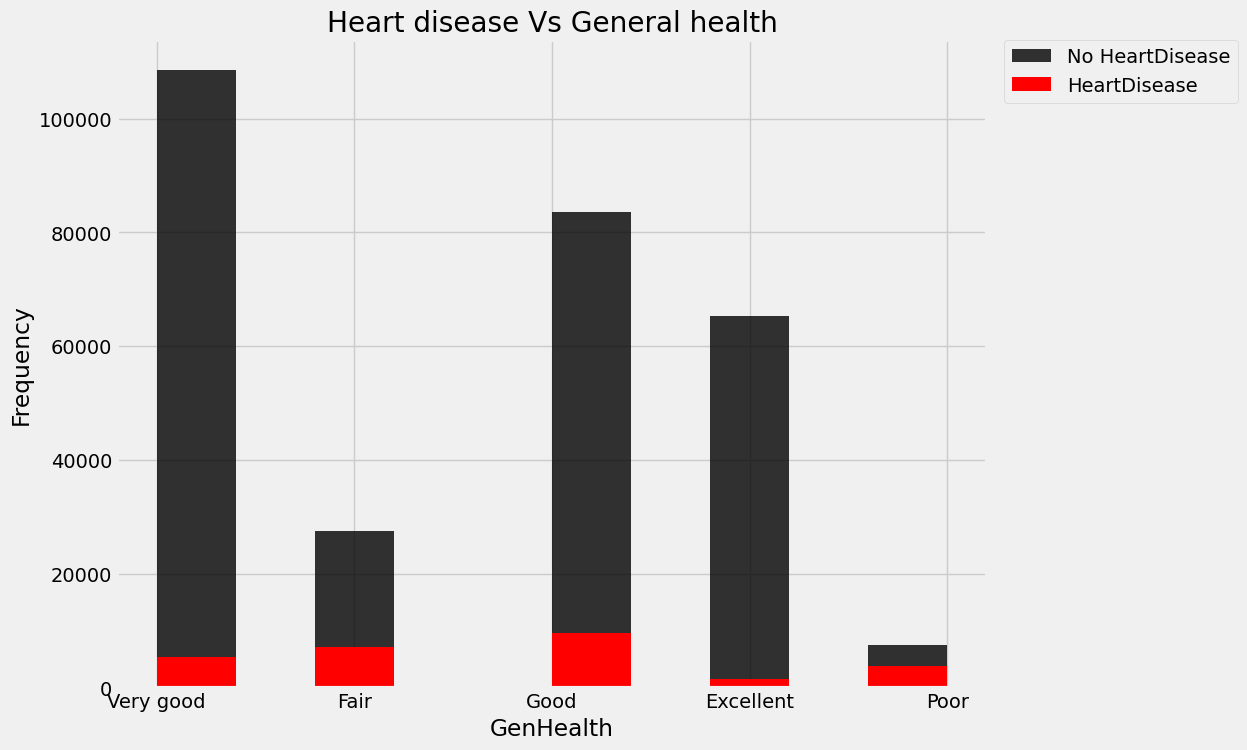

In [78]:


fig, ax = plt.subplots(figsize = (10,8))

ax.hist(data[data["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="k", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=1, color="r", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")
plt.title('Heart disease Vs General health')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Most poor general health Patients have high heart Disease

##the relation of Heart disease & BMI

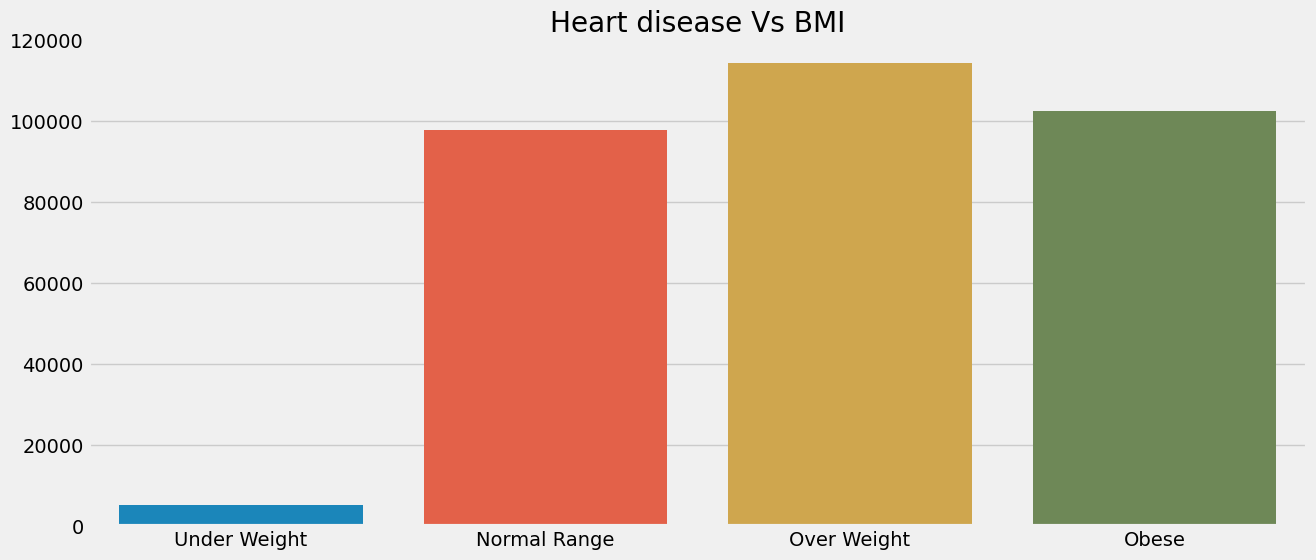

In [79]:
# classification of BMI (Body Mass Index) by ranges :
BMI_UnderWeight = data['BMI'][(data['BMI']>=0) & (data['BMI'] <= 18.5)]
BMI_NormalRange = data['BMI'][(data['BMI']>18.5) & (data['BMI'] <= 25)]
BMI_OverrWeight = data['BMI'][(data['BMI']>25) & (data['BMI'] <= 30)]
BMI_Obese = data['BMI'][(data['BMI']>30)]

BMI_X = ['Under Weight','Normal Range','Over Weight','Obese']
BMI_Y = [len(BMI_UnderWeight.values),len(BMI_NormalRange.values),len(BMI_OverrWeight.values),len(BMI_Obese.values)]

plt.figure(figsize = (14,6))
sns.barplot (x = BMI_X, y = BMI_Y)
plt.title('Heart disease Vs BMI')
plt.show()

<Axes: >

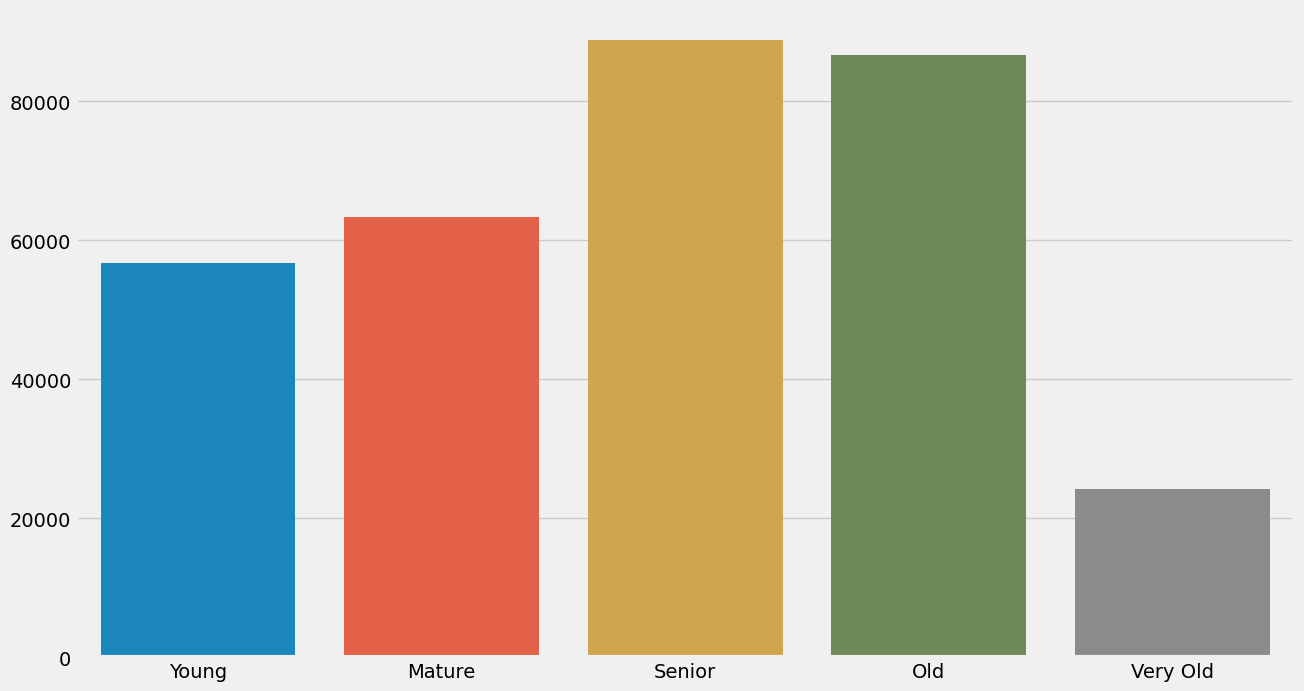

In [80]:
# classification of Age Category by ranges :
Young   = data['AgeCategory'][(data['AgeCategory'] <= 32.0)]
Mature  = data['AgeCategory'][(data['AgeCategory'] >= 37.0) & (data['AgeCategory'] <= 47.0)]
Senior  = data['AgeCategory'][(data['AgeCategory'] >= 52.0) & (data['AgeCategory'] <= 62.0)]
Old     = data['AgeCategory'][(data['AgeCategory'] >= 67.0) & (data['AgeCategory'] <= 77.0)]
Veryold = data['AgeCategory'][(data['AgeCategory'] == 80.0)]

Age_X = ['Young','Mature','Senior','Old','Very Old']
Age_Y = [len(Young.values),len(Mature.values),len(Senior.values),len(Old.values),len(Veryold.values)]

plt.figure(figsize = (14,8))
sns.barplot (x = Age_X, y = Age_Y)

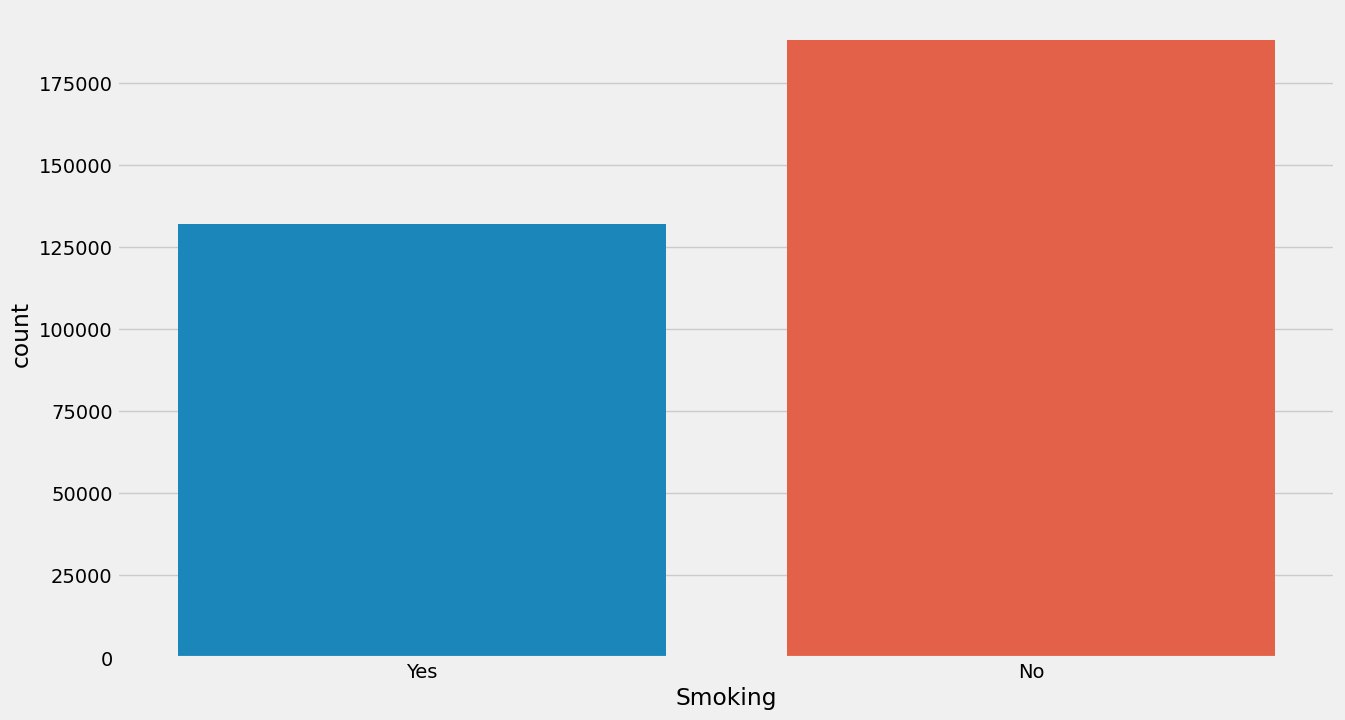

In [81]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Smoking")
plt.show()

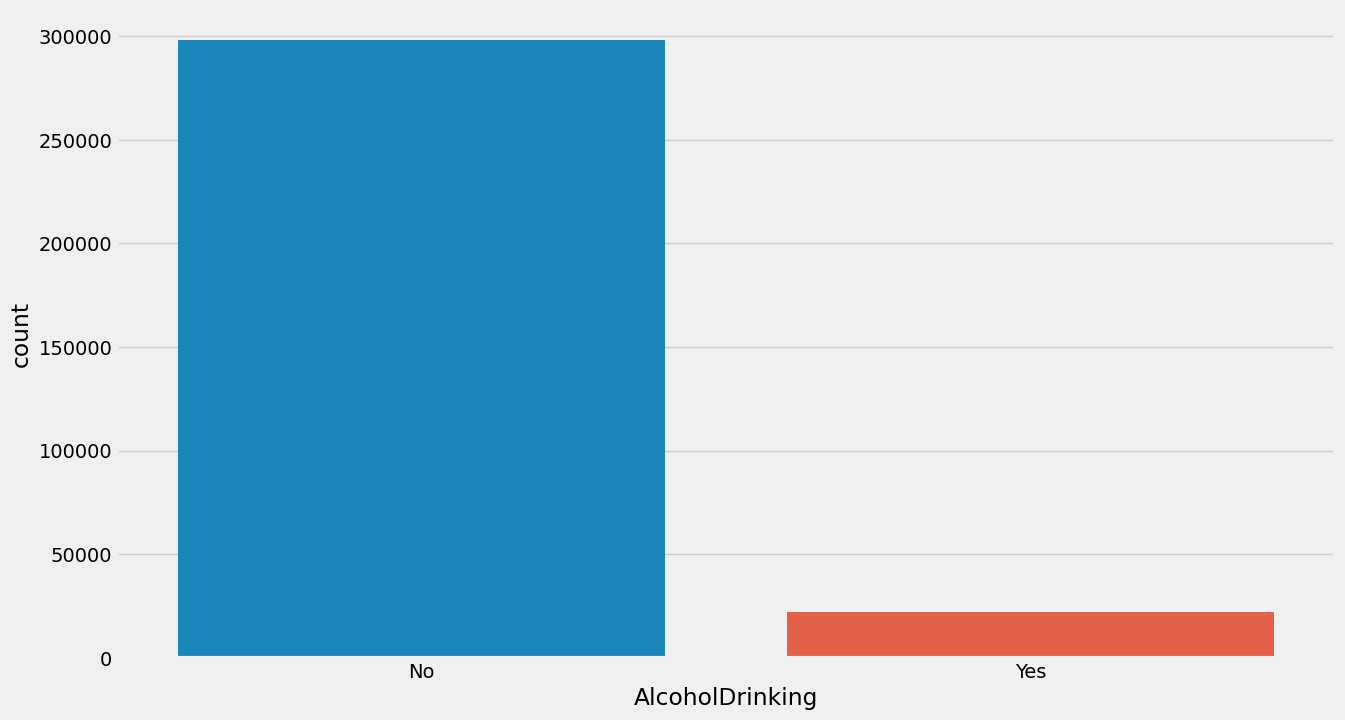

In [82]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="AlcoholDrinking")
plt.show()

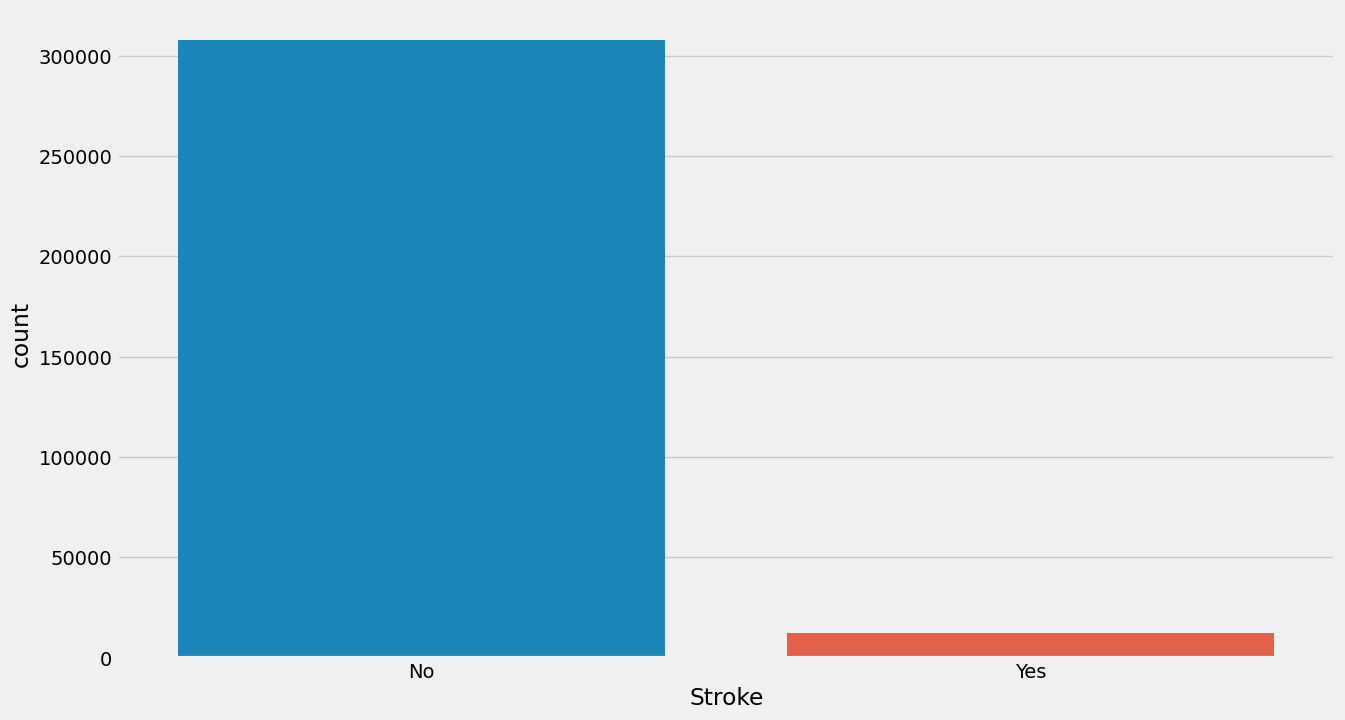

In [83]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Stroke")
plt.show()

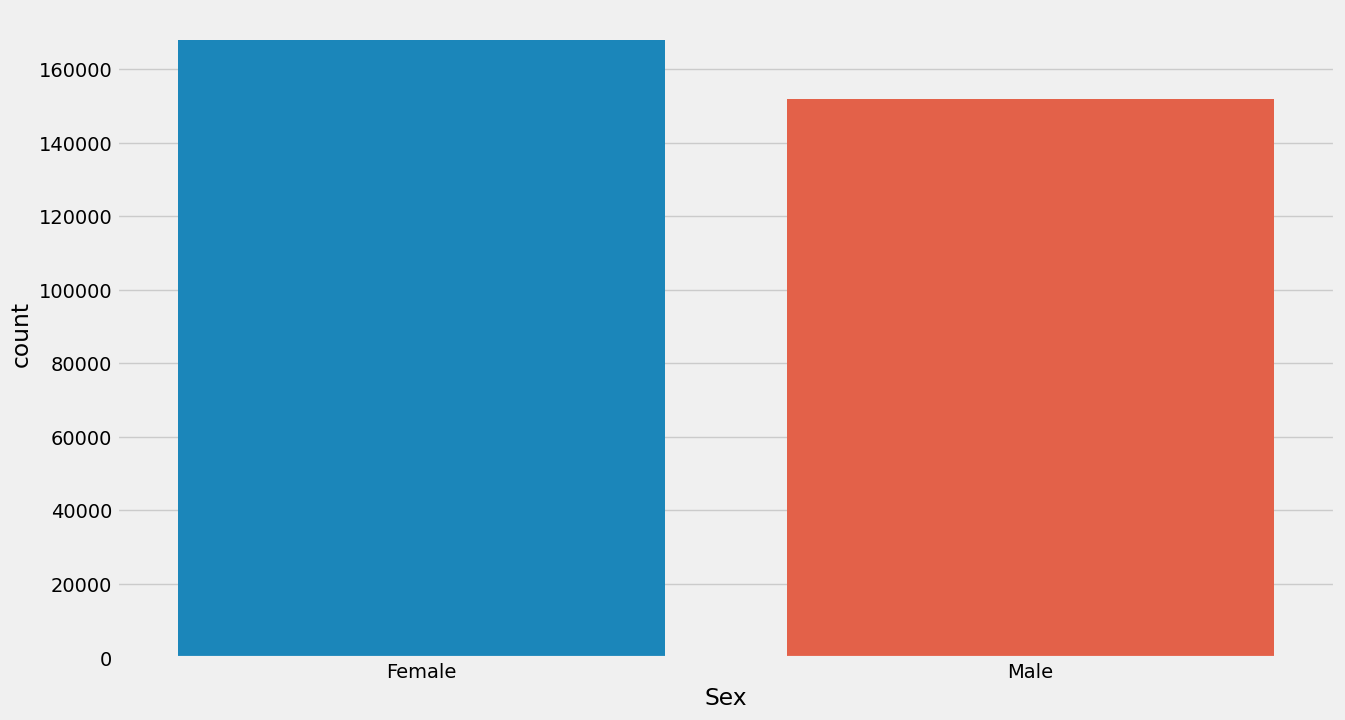

In [84]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Sex")
plt.show()

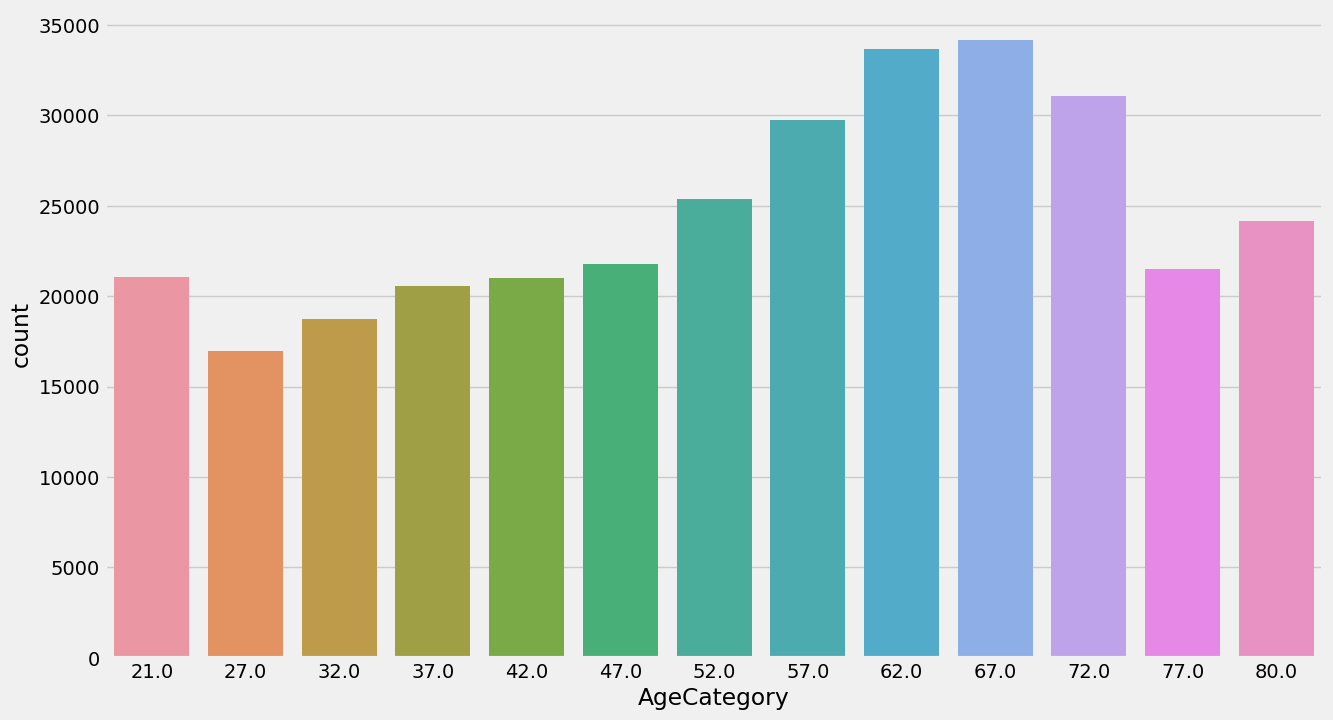

In [85]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="AgeCategory")
plt.show()

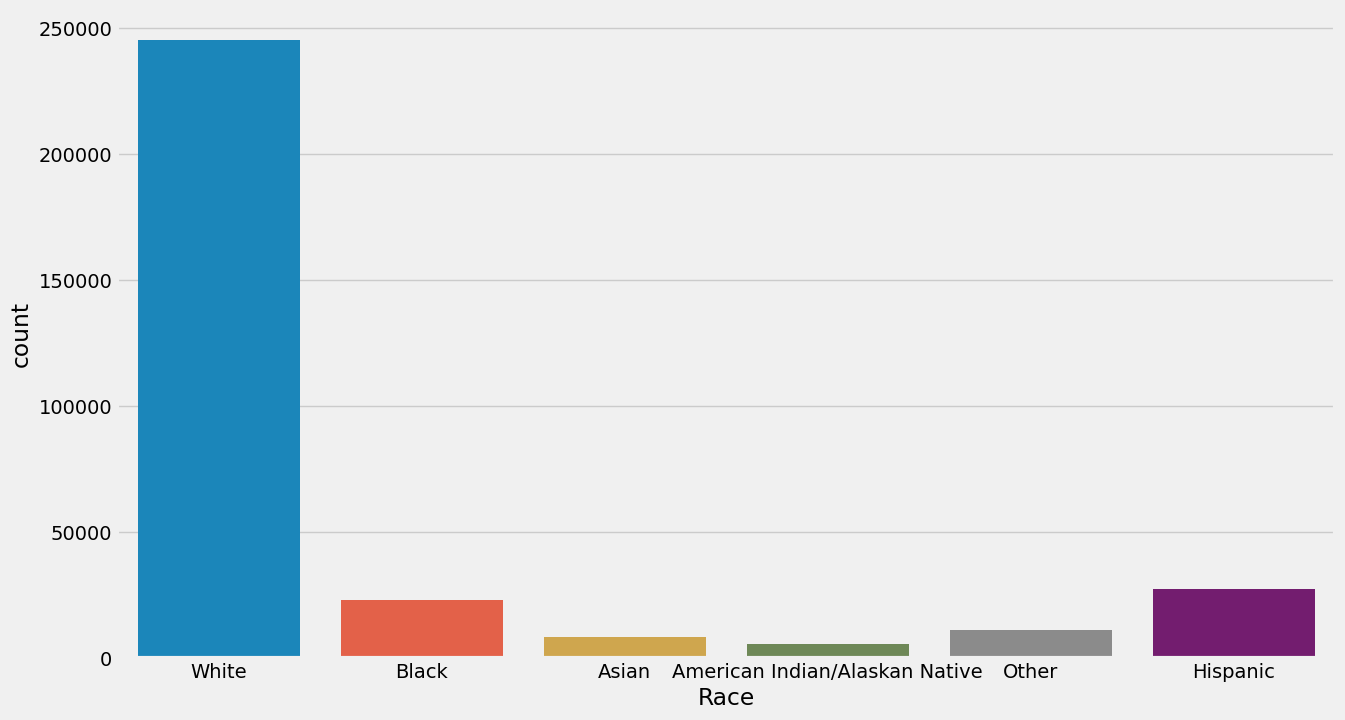

In [86]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Race")
plt.show()

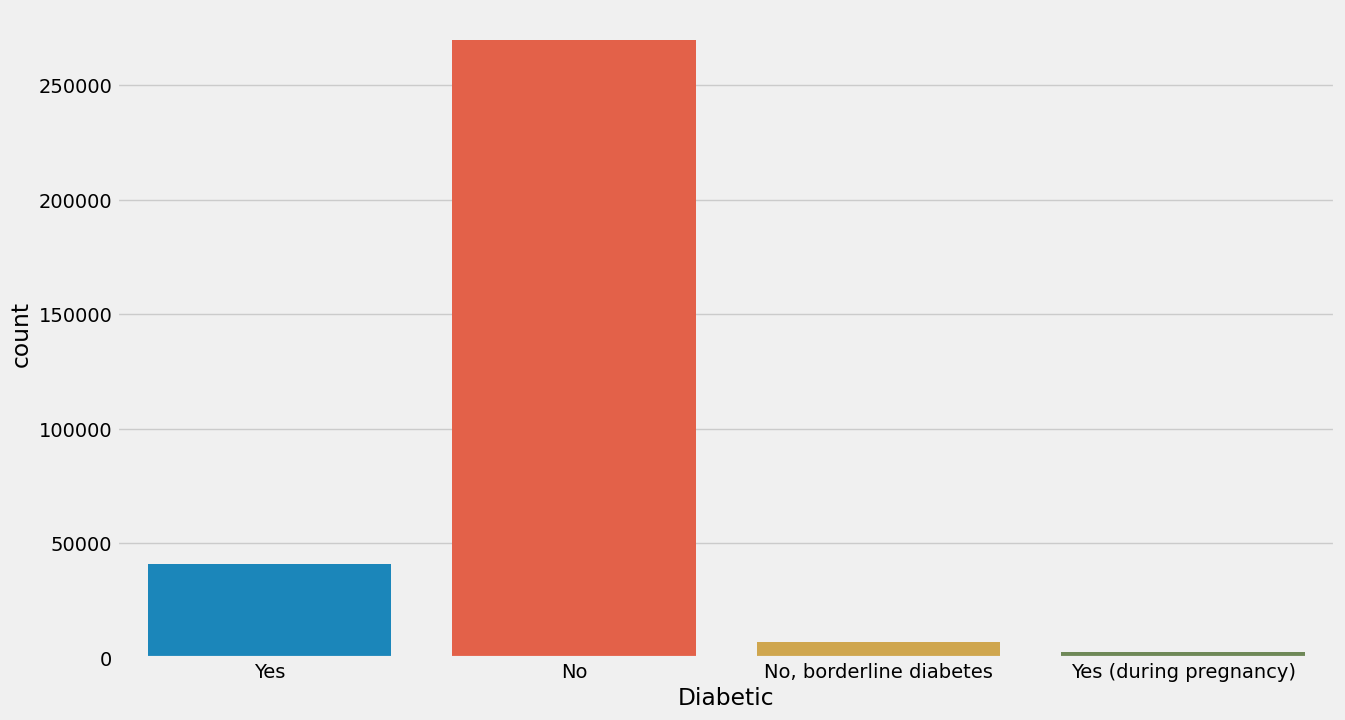

In [87]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Diabetic")
plt.show()

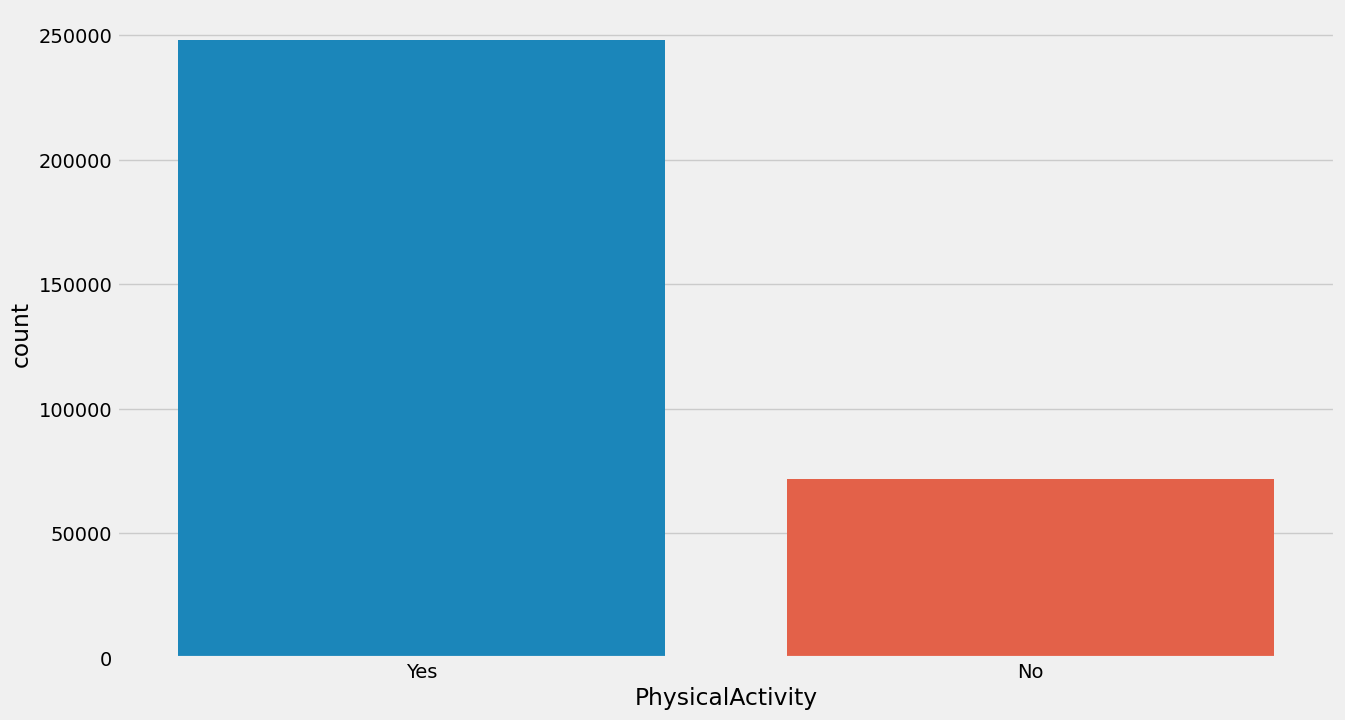

In [88]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="PhysicalActivity")
plt.show()

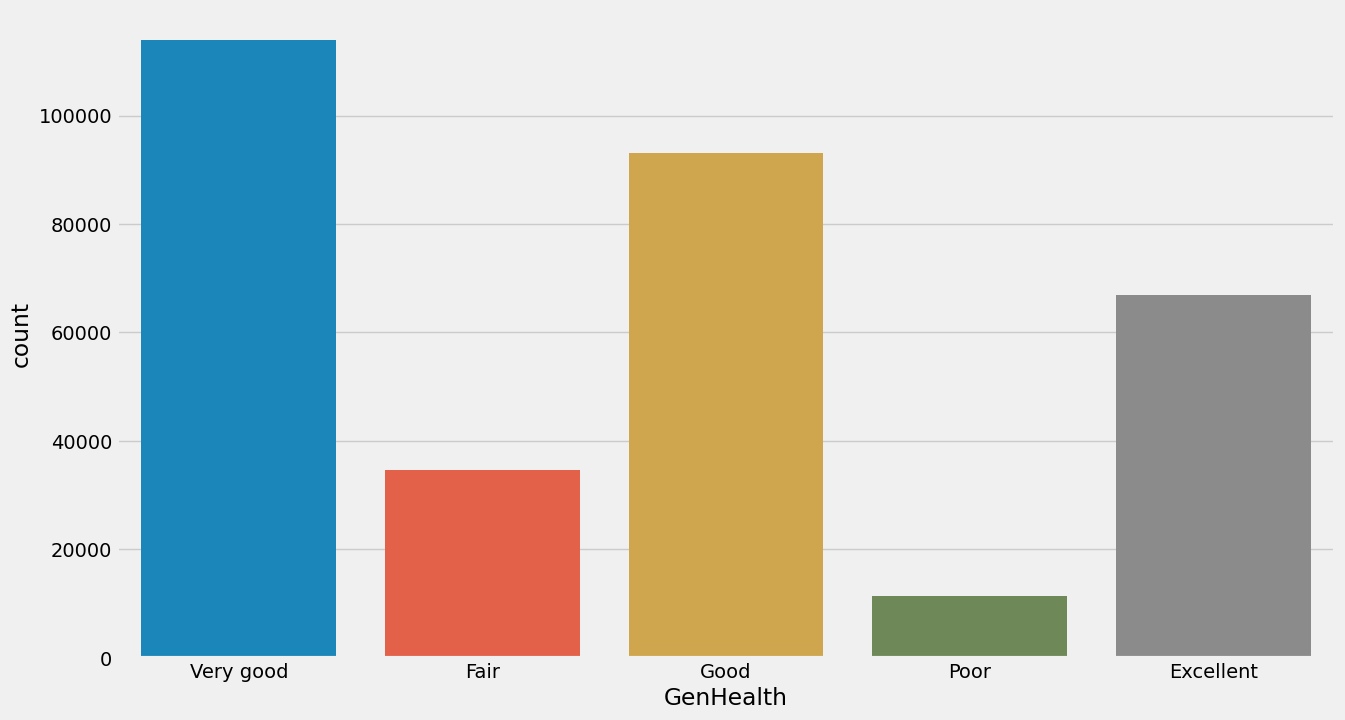

In [89]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="GenHealth")
plt.show()

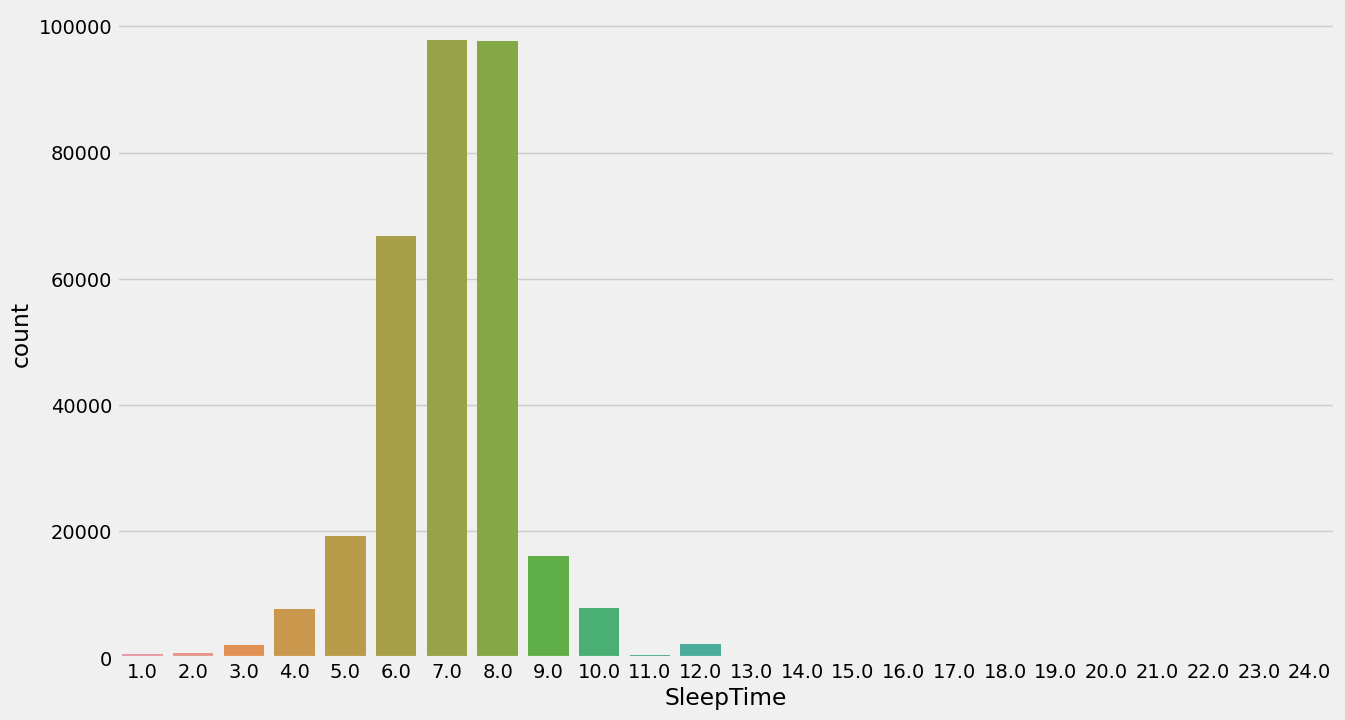

In [90]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="SleepTime")
plt.show()

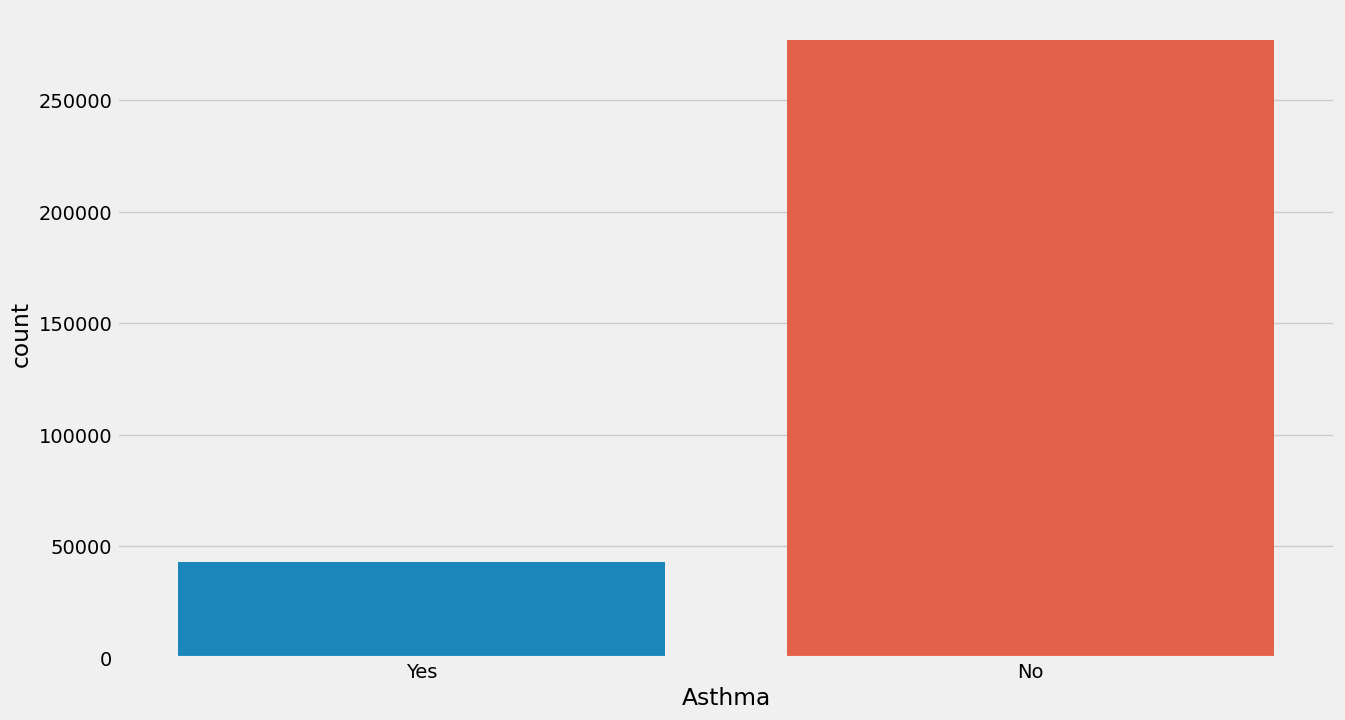

In [91]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="Asthma")
plt.show()

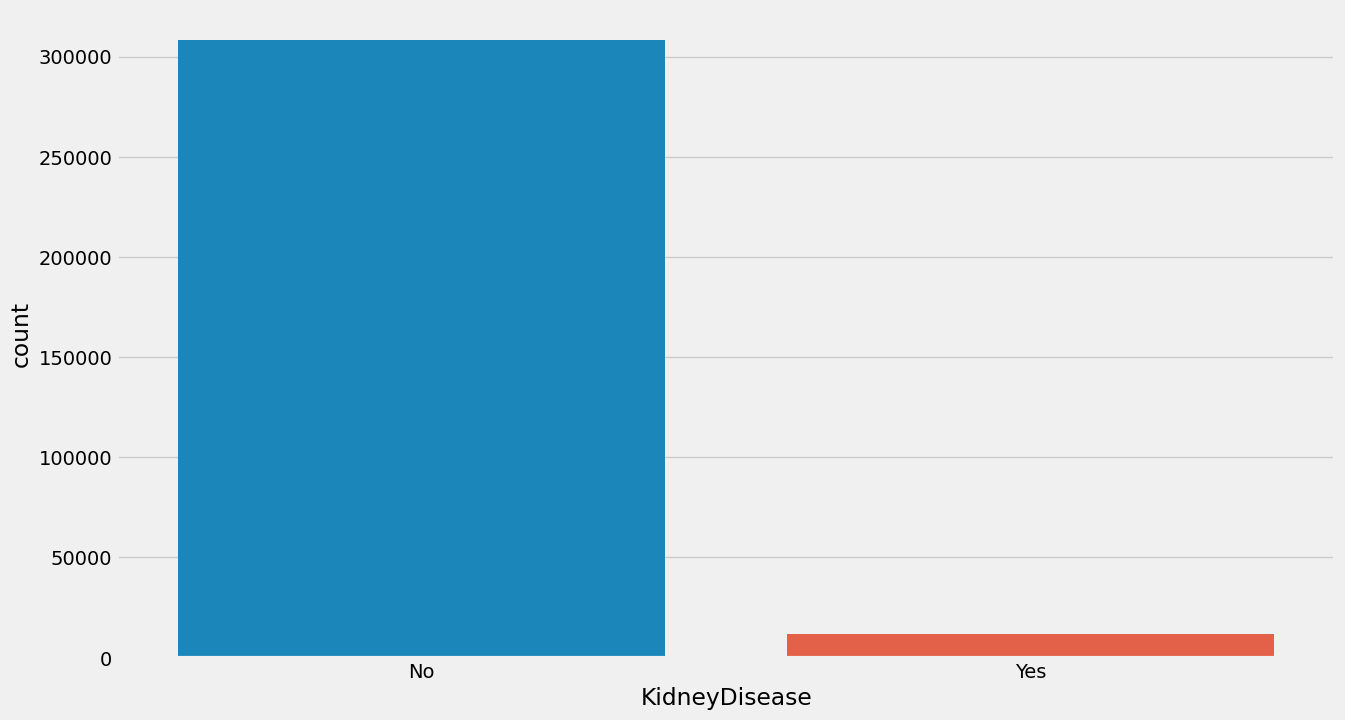

In [92]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="KidneyDisease")
plt.show()

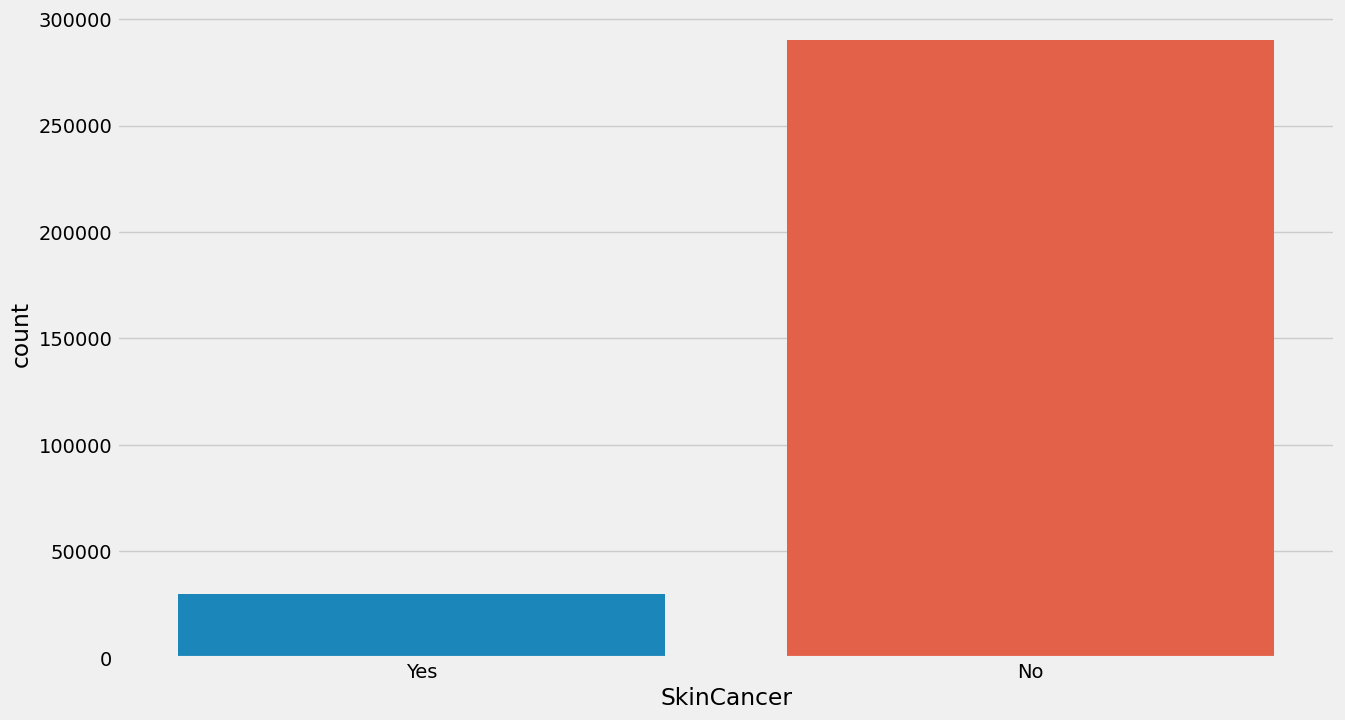

In [93]:
plt.figure(figsize = (14,8))
sns.countplot(data=data,x="SkinCancer")
plt.show()

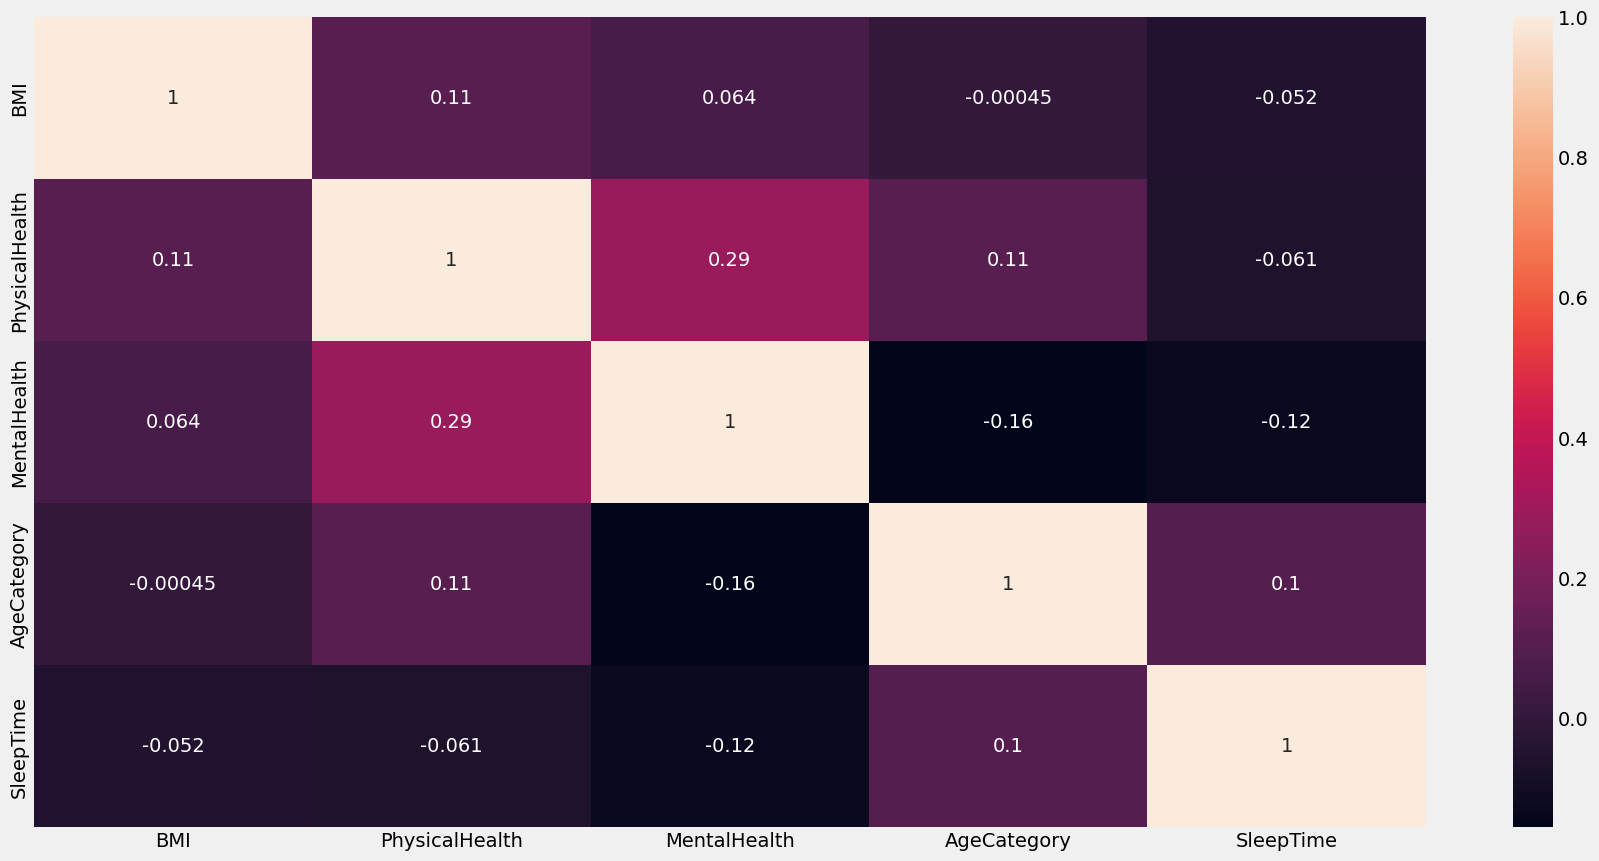

In [94]:
plt.figure(1,figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

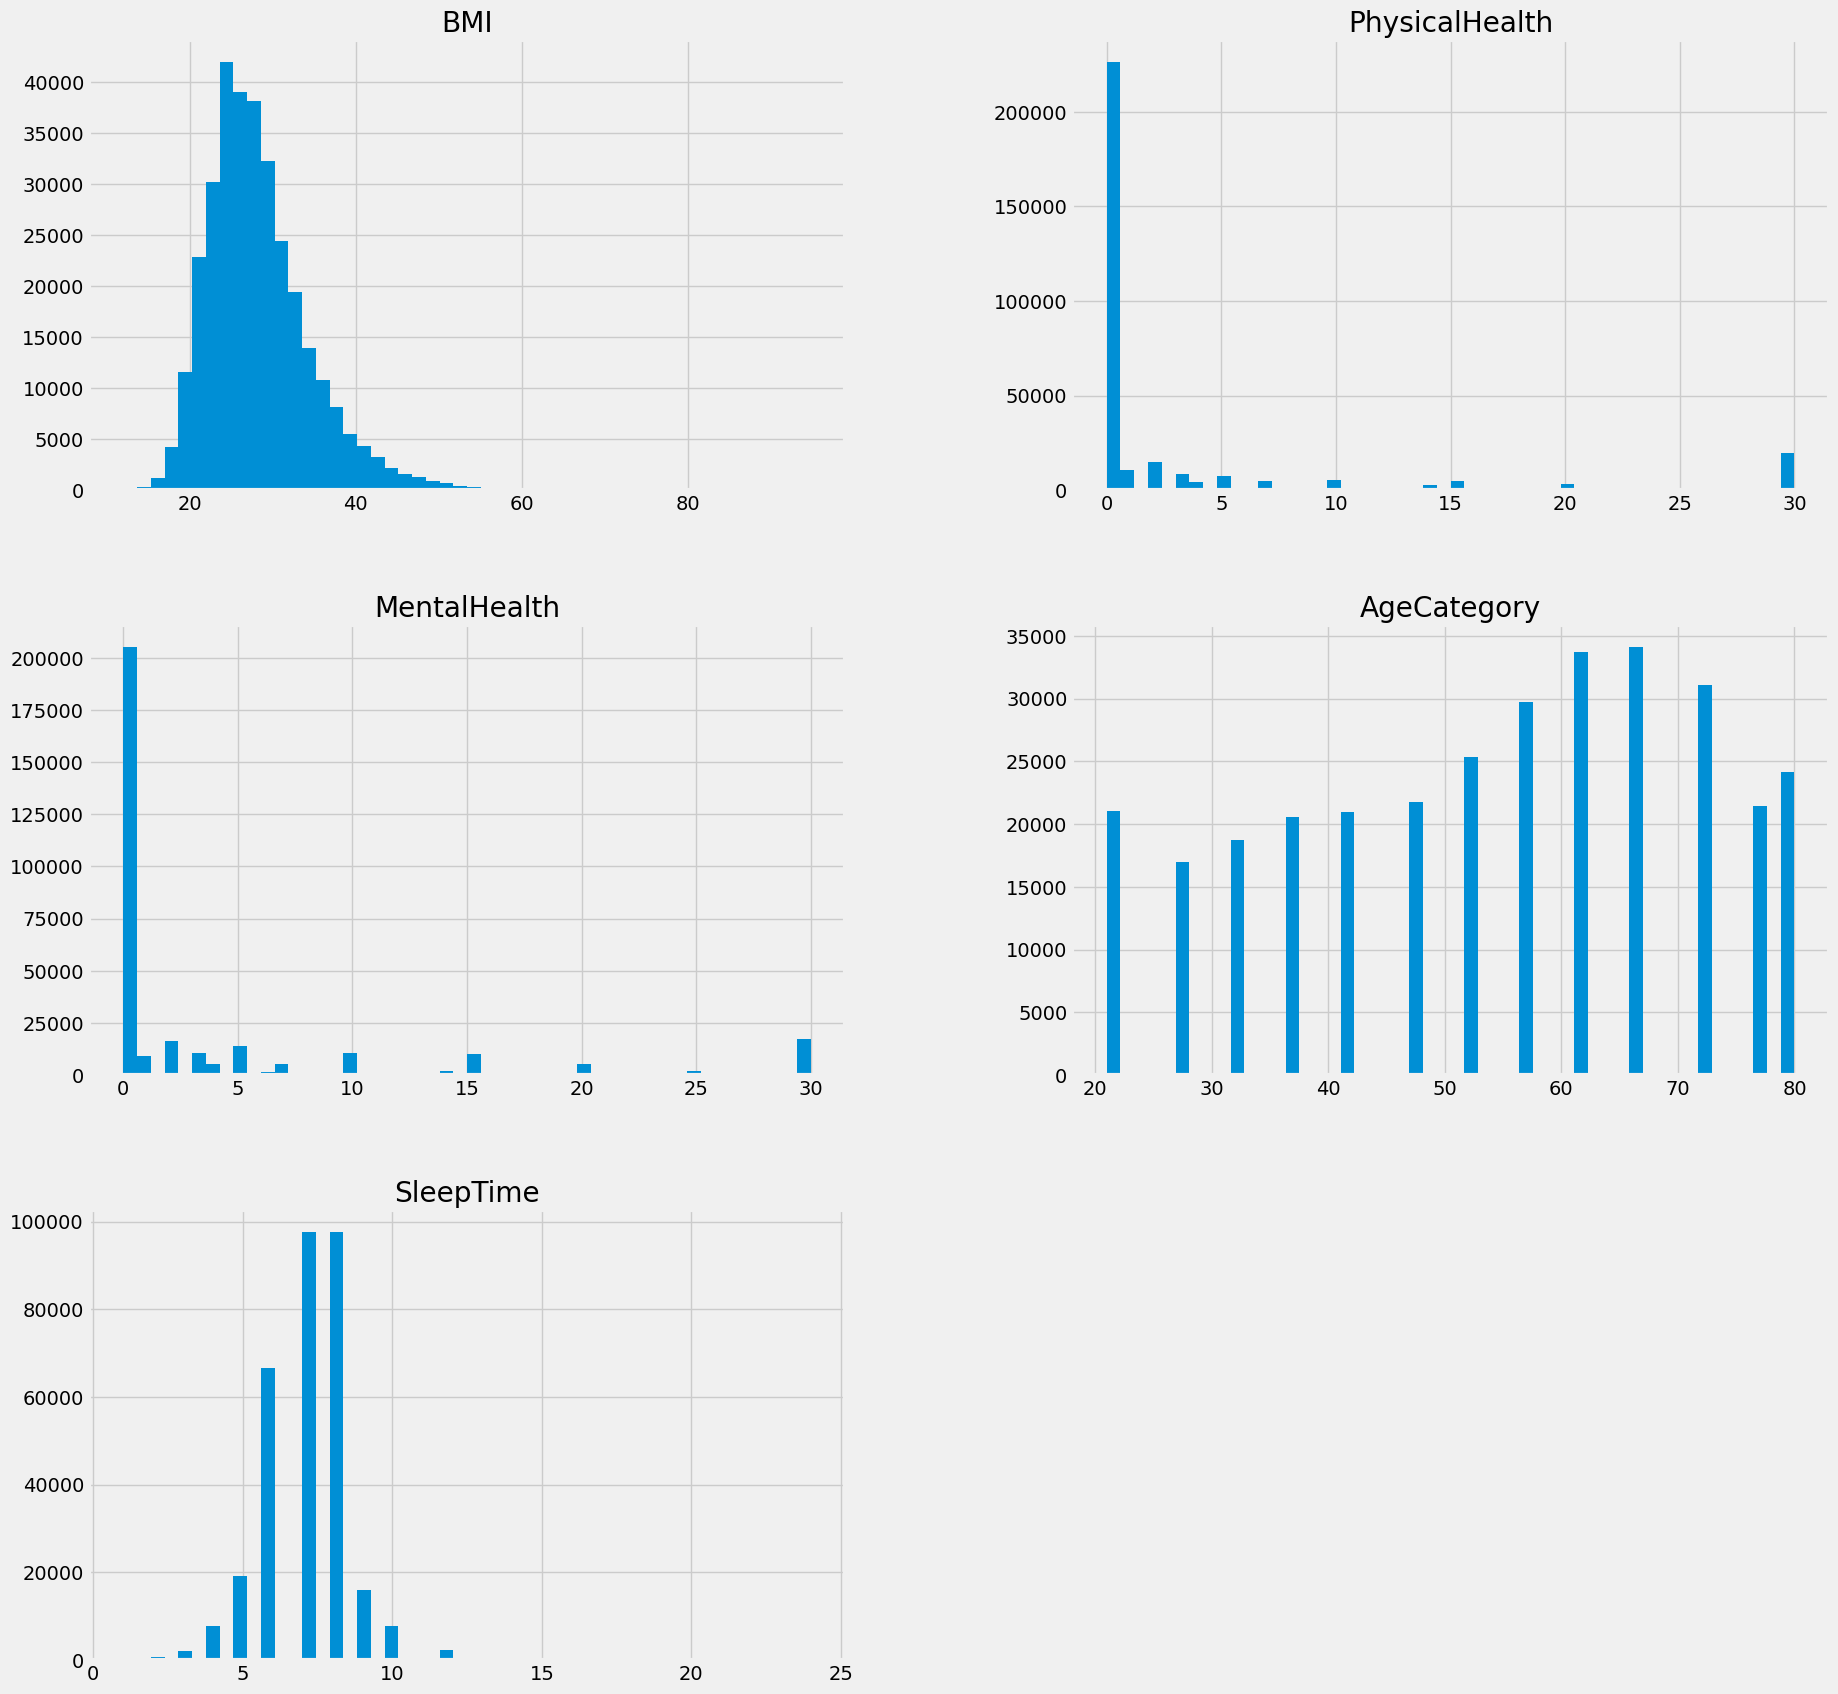

In [95]:
data.hist(bins=50, figsize=(20,20))
plt.show()

##Converting catergical data to numerical

In [96]:
cat_columns = data.select_dtypes(['object']).columns
cat_columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [97]:
data_1 = pd.get_dummies(data, columns = cat_columns[1:])
data_1['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)
data_1.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,57.0,5.0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,80.0,7.0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,67.0,8.0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,77.0,6.0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,42.0,8.0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0


## Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
X = data_1.drop('HeartDisease',axis=1)
y = data_1['HeartDisease']
X = StandardScaler().fit(X).transform(X)

balancing the heart disease results

In [99]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
over = SMOTE(k_neighbors=2000)
X, y = over.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

##Modeling

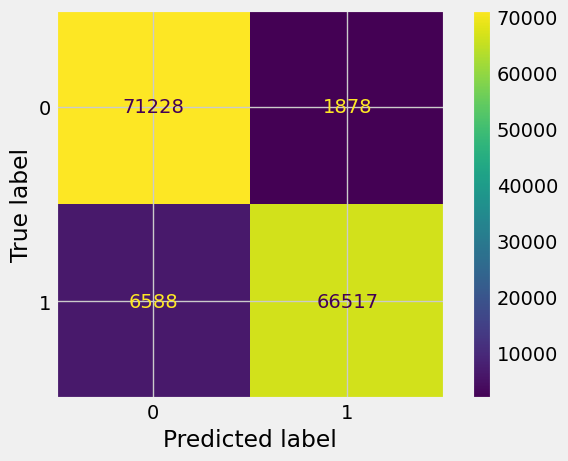

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
RF=RandomForestClassifier(random_state = 44, max_depth=20)
RF.fit(X_train,y_train)
# Generate predictions with the best model
y_pred = RF.predict(X_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [101]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_Score= f1_score(y_test,y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score:", f1_Score)

Accuracy: 0.9420973798141042
Precision: 0.9725418524745961
Recall: 0.909883044935367
F1_Score: 0.9401696113074205
